In [1]:
path=('C:\chrome-win64.exe')

In [71]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.chrome.service import Service
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [4]:
driver = webdriver.Chrome()

driver.get('https://finance.yahoo.com/screener/predefined/sec-ind_sec-largest-equities_technology/')

def fetch_data():
    try:
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')
        table = soup.find('table')

        if table:
            tbody = table.find('tbody')
            if tbody:
                data = []
                for row in tbody.find_all('tr'):
                    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
                    data.append(row_data)

                df = pd.DataFrame(data, columns=["Symbol", "Name", "Price (Intraday)", "Change", "% Change", "Volume", "Avg Vol (3 month)", "Market Cap", "PE Ratio (TTM)", "52 Week Range"])

                return df
            else:
                print("Table body not found.")
                return None
        else:
            print("Table not found.")
            return None
    except Exception as e:
        print("Error occurred while fetching data:", e)
        return None

df_list = [fetch_data()]

num_clicks = 19

for _ in range(num_clicks):
    try:
        next_button = WebDriverWait(driver, 20).until(
            EC.visibility_of_element_located((By.XPATH, '//*[@id="scr-res-table"]/div[2]/button[3]'))
        )
        driver.execute_script("arguments[0].scrollIntoView();", next_button)

        driver.execute_script("arguments[0].click();", next_button)
        
        time.sleep(3) 

        df = fetch_data()
        if df is not None:
            df_list.append(df)
    except Exception as e:
        print("Error occurred while clicking Next button:", e)

final_df = pd.concat(df_list, ignore_index=True)


driver.quit()

final_df

Table not found.
Table not found.


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,MSFT,Microsoft Corporation,394.94,+5.61,+1.44%,23.021M,20.917M,2.935T,34.25,
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614T,26.33,
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076T,69.43,
3,AVGO,Broadcom Inc.,"1,242.86",-57.41,-4.42%,3.038M,2.975M,575.967B,46.08,
4,ORCL,Oracle Corporation,114.63,+0.88,+0.77%,5.581M,8.492M,315.062B,30.25,
...,...,...,...,...,...,...,...,...,...,...
415,ALAB,"Astera Labs, Inc.",74.83,-9.93,-11.72%,3.948M,3.477M,11.634B,N/A,
416,GCTS,"GCT Semiconductor Holding, Inc.",5.04,+0.32,+6.78%,"239,423","844,342",231M,N/A,
417,SMXT,"SolarMax Technology, Inc.",10.34,+0.54,+5.51%,"100,022","288,400",467.858M,N/A,
418,IBTA,"Ibotta, Inc.",99.50,-2.77,-2.71%,"167,187","367,844",2.697B,N/A,


In [5]:
final_df.to_csv('Technology_Sector.csv')

In [203]:
df=pd.read_csv('Technology_Sector.csv') 

In [204]:
df.drop(['Unnamed: 0','52 Week Range'],axis=1,inplace=True)

In [205]:
df

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,MSFT,Microsoft Corporation,394.94,5.61,1.44%,23.021M,20.917M,2.935T,34.25
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614T,26.33
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076T,69.43
3,AVGO,Broadcom Inc.,1242.86,-57.41,-4.42%,3.038M,2.975M,575.967B,46.08
4,ORCL,Oracle Corporation,114.63,0.88,0.77%,5.581M,8.492M,315.062B,30.25
5,CRM,"Salesforce, Inc.",268.69,-0.25,-0.09%,3.759M,5.721M,260.629B,64.13
6,AMD,"Advanced Micro Devices, Inc.",144.27,-14.11,-8.91%,87.185M,64.875M,233.161B,209.09
7,ADBE,Adobe Inc.,469.39,6.56,1.42%,2.488M,3.809M,210.287B,44.87
8,CSCO,"Cisco Systems, Inc.",46.84,-0.14,-0.30%,17.707M,19.562M,189.664B,14.24
9,ACN,Accenture plc,298.66,-2.25,-0.75%,2.613M,2.68M,187.776B,27.1


In [206]:
df.isnull().sum()

Symbol                 0
Name                   0
Price (Intraday)       0
Change                 0
% Change               0
Volume                 0
Avg Vol (3 month)      0
Market Cap             0
PE Ratio (TTM)       196
dtype: int64

# Problem Statement 
determining whether a company's stock price is overvalued or undervalued based on the average price-to-earnings (PE) ratio.

In [207]:
# Define a function to convert market cap values
def convert_market_cap(value):
    if isinstance(value, str):
        if value.endswith('T'):
            return float(value[:-1]) * 10**12
        elif value.endswith('B'):
            return float(value[:-1]) * 10**9
        elif value.endswith('M'):
            return float(value[:-1]) * 10**6
    else:
        return value

df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)

df

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,MSFT,Microsoft Corporation,394.94,5.61,1.44%,23.021M,20.917M,2.935000e+12,34.25
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614000e+12,26.33
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076000e+12,69.43
3,AVGO,Broadcom Inc.,1242.86,-57.41,-4.42%,3.038M,2.975M,5.759670e+11,46.08
4,ORCL,Oracle Corporation,114.63,0.88,0.77%,5.581M,8.492M,3.150620e+11,30.25
5,CRM,"Salesforce, Inc.",268.69,-0.25,-0.09%,3.759M,5.721M,2.606290e+11,64.13
6,AMD,"Advanced Micro Devices, Inc.",144.27,-14.11,-8.91%,87.185M,64.875M,2.331610e+11,209.09
7,ADBE,Adobe Inc.,469.39,6.56,1.42%,2.488M,3.809M,2.102870e+11,44.87
8,CSCO,"Cisco Systems, Inc.",46.84,-0.14,-0.30%,17.707M,19.562M,1.896640e+11,14.24
9,ACN,Accenture plc,298.66,-2.25,-0.75%,2.613M,2.68M,1.877760e+11,27.1


In [208]:
df.rename(columns = {'Price (Intraday)':'Price'}, inplace = True) 

In [209]:
df

,Symbol,Name,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,MSFT,Microsoft Corporation,394.94,5.61,1.44%,23.021M,20.917M,2.935000e+12,34.25
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614000e+12,26.33
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076000e+12,69.43
3,AVGO,Broadcom Inc.,1242.86,-57.41,-4.42%,3.038M,2.975M,5.759670e+11,46.08
4,ORCL,Oracle Corporation,114.63,0.88,0.77%,5.581M,8.492M,3.150620e+11,30.25
5,CRM,"Salesforce, Inc.",268.69,-0.25,-0.09%,3.759M,5.721M,2.606290e+11,64.13
6,AMD,"Advanced Micro Devices, Inc.",144.27,-14.11,-8.91%,87.185M,64.875M,2.331610e+11,209.09
7,ADBE,Adobe Inc.,469.39,6.56,1.42%,2.488M,3.809M,2.102870e+11,44.87
8,CSCO,"Cisco Systems, Inc.",46.84,-0.14,-0.30%,17.707M,19.562M,1.896640e+11,14.24
9,ACN,Accenture plc,298.66,-2.25,-0.75%,2.613M,2.68M,1.877760e+11,27.1


In [210]:
df.dropna(subset=['PE Ratio (TTM)'], inplace=True)

In [211]:
df['PE Ratio (TTM)'] = df['PE Ratio (TTM)'].str.replace(',', '').str.extract(r'(\d+\.?\d*)').astype(float)

In [212]:
df['PE Ratio (TTM)'].mean()

84.47946428571429

In [213]:
# Define the range for overvalued and undervalued based on the average PE ratio
average_pe_ratio = 84.47
overvalued_threshold = 1.2 * average_pe_ratio
undervalued_threshold = 0.8 * average_pe_ratio

# Create a function to label companies based on their PE ratio
def label_valuation(pe_ratio):
    if pe_ratio > overvalued_threshold:
        return 'Overvalued'
    elif pe_ratio < undervalued_threshold:
        return 'Undervalued'
    else:
        return 'Fairly Valued'

df['Valuation'] = df['PE Ratio (TTM)'].apply(label_valuation)

df

,Symbol,Name,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),Valuation
0,MSFT,Microsoft Corporation,394.94,5.61,1.44%,23.021M,20.917M,2.935000e+12,34.25,Undervalued
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614000e+12,26.33,Undervalued
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076000e+12,69.43,Fairly Valued
3,AVGO,Broadcom Inc.,1242.86,-57.41,-4.42%,3.038M,2.975M,5.759670e+11,46.08,Undervalued
4,ORCL,Oracle Corporation,114.63,0.88,0.77%,5.581M,8.492M,3.150620e+11,30.25,Undervalued
5,CRM,"Salesforce, Inc.",268.69,-0.25,-0.09%,3.759M,5.721M,2.606290e+11,64.13,Undervalued
6,AMD,"Advanced Micro Devices, Inc.",144.27,-14.11,-8.91%,87.185M,64.875M,2.331610e+11,209.09,Overvalued
7,ADBE,Adobe Inc.,469.39,6.56,1.42%,2.488M,3.809M,2.102870e+11,44.87,Undervalued
8,CSCO,"Cisco Systems, Inc.",46.84,-0.14,-0.30%,17.707M,19.562M,1.896640e+11,14.24,Undervalued
9,ACN,Accenture plc,298.66,-2.25,-0.75%,2.613M,2.68M,1.877760e+11,27.10,Undervalued


In [214]:
df['PE Ratio (TTM)'].mean()

84.47946428571429

In [215]:
dff = df.copy()

In [216]:
dff

,Symbol,Name,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),Valuation
0,MSFT,Microsoft Corporation,394.94,5.61,1.44%,23.021M,20.917M,2.935000e+12,34.25,Undervalued
1,AAPL,Apple Inc.,169.30,-1.03,-0.60%,49.377M,61.033M,2.614000e+12,26.33,Undervalued
2,NVDA,NVIDIA Corporation,830.41,-33.61,-3.89%,55.335M,54.083M,2.076000e+12,69.43,Fairly Valued
3,AVGO,Broadcom Inc.,1242.86,-57.41,-4.42%,3.038M,2.975M,5.759670e+11,46.08,Undervalued
4,ORCL,Oracle Corporation,114.63,0.88,0.77%,5.581M,8.492M,3.150620e+11,30.25,Undervalued
5,CRM,"Salesforce, Inc.",268.69,-0.25,-0.09%,3.759M,5.721M,2.606290e+11,64.13,Undervalued
6,AMD,"Advanced Micro Devices, Inc.",144.27,-14.11,-8.91%,87.185M,64.875M,2.331610e+11,209.09,Overvalued
7,ADBE,Adobe Inc.,469.39,6.56,1.42%,2.488M,3.809M,2.102870e+11,44.87,Undervalued
8,CSCO,"Cisco Systems, Inc.",46.84,-0.14,-0.30%,17.707M,19.562M,1.896640e+11,14.24,Undervalued
9,ACN,Accenture plc,298.66,-2.25,-0.75%,2.613M,2.68M,1.877760e+11,27.10,Undervalued


In [217]:
dff.drop(['PE Ratio (TTM)'],axis=1,inplace=True)

In [218]:
dff.drop(['Symbol','Name'],axis=1,inplace=True)

In [219]:
dff

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,Valuation
0,394.94,5.61,1.44%,23.021M,20.917M,2.935000e+12,Undervalued
1,169.30,-1.03,-0.60%,49.377M,61.033M,2.614000e+12,Undervalued
2,830.41,-33.61,-3.89%,55.335M,54.083M,2.076000e+12,Fairly Valued
3,1242.86,-57.41,-4.42%,3.038M,2.975M,5.759670e+11,Undervalued
4,114.63,0.88,0.77%,5.581M,8.492M,3.150620e+11,Undervalued
5,268.69,-0.25,-0.09%,3.759M,5.721M,2.606290e+11,Undervalued
6,144.27,-14.11,-8.91%,87.185M,64.875M,2.331610e+11,Overvalued
7,469.39,6.56,1.42%,2.488M,3.809M,2.102870e+11,Undervalued
8,46.84,-0.14,-0.30%,17.707M,19.562M,1.896640e+11,Undervalued
9,298.66,-2.25,-0.75%,2.613M,2.68M,1.877760e+11,Undervalued


In [220]:
# Convert values with 'M' to millions
dff.loc[dff['Volume'].str.endswith('M'), 'Volume'] = dff.loc[dff['Volume'].str.endswith('M'), 'Volume'].str.replace('M', '').astype(float) * 1e6
dff.loc[dff['Avg Vol (3 month)'].str.endswith('M'), 'Avg Vol (3 month)'] = dff.loc[dff['Avg Vol (3 month)'].str.endswith('M'), 'Avg Vol (3 month)'].str.replace('M', '').astype(float) * 1e6

dff

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,Valuation
0,394.94,5.61,1.44%,23021000.0,20917000.0,2.935000e+12,Undervalued
1,169.30,-1.03,-0.60%,49377000.0,61033000.0,2.614000e+12,Undervalued
2,830.41,-33.61,-3.89%,55335000.0,54083000.0,2.076000e+12,Fairly Valued
3,1242.86,-57.41,-4.42%,3038000.0,2975000.0,5.759670e+11,Undervalued
4,114.63,0.88,0.77%,5581000.0,8492000.0,3.150620e+11,Undervalued
5,268.69,-0.25,-0.09%,3759000.0,5721000.0,2.606290e+11,Undervalued
6,144.27,-14.11,-8.91%,87185000.0,64875000.0,2.331610e+11,Overvalued
7,469.39,6.56,1.42%,2488000.0,3809000.0,2.102870e+11,Undervalued
8,46.84,-0.14,-0.30%,17707000.0,19562000.0,1.896640e+11,Undervalued
9,298.66,-2.25,-0.75%,2613000.0,2680000.0,1.877760e+11,Undervalued


In [221]:
# Remove the percentage sign and convert to float
dff['% Change'] = dff['% Change'].str.replace('%', '').astype(float)

dff

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap,Valuation
0,394.94,5.61,1.44,23021000.0,20917000.0,2.935000e+12,Undervalued
1,169.30,-1.03,-0.60,49377000.0,61033000.0,2.614000e+12,Undervalued
2,830.41,-33.61,-3.89,55335000.0,54083000.0,2.076000e+12,Fairly Valued
3,1242.86,-57.41,-4.42,3038000.0,2975000.0,5.759670e+11,Undervalued
4,114.63,0.88,0.77,5581000.0,8492000.0,3.150620e+11,Undervalued
5,268.69,-0.25,-0.09,3759000.0,5721000.0,2.606290e+11,Undervalued
6,144.27,-14.11,-8.91,87185000.0,64875000.0,2.331610e+11,Overvalued
7,469.39,6.56,1.42,2488000.0,3809000.0,2.102870e+11,Undervalued
8,46.84,-0.14,-0.30,17707000.0,19562000.0,1.896640e+11,Undervalued
9,298.66,-2.25,-0.75,2613000.0,2680000.0,1.877760e+11,Undervalued


In [222]:
X=dff.drop(columns=['Valuation'])

In [223]:
X

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap
0,394.94,5.61,1.44,23021000.0,20917000.0,2.935000e+12
1,169.30,-1.03,-0.60,49377000.0,61033000.0,2.614000e+12
2,830.41,-33.61,-3.89,55335000.0,54083000.0,2.076000e+12
3,1242.86,-57.41,-4.42,3038000.0,2975000.0,5.759670e+11
4,114.63,0.88,0.77,5581000.0,8492000.0,3.150620e+11
5,268.69,-0.25,-0.09,3759000.0,5721000.0,2.606290e+11
6,144.27,-14.11,-8.91,87185000.0,64875000.0,2.331610e+11
7,469.39,6.56,1.42,2488000.0,3809000.0,2.102870e+11
8,46.84,-0.14,-0.30,17707000.0,19562000.0,1.896640e+11
9,298.66,-2.25,-0.75,2613000.0,2680000.0,1.877760e+11


In [224]:
y=dff['Valuation']

In [225]:
y

0        Undervalued
1        Undervalued
2      Fairly Valued
3        Undervalued
4        Undervalued
5        Undervalued
6         Overvalued
7        Undervalued
8        Undervalued
9        Undervalued
10       Undervalued
11       Undervalued
12       Undervalued
13       Undervalued
14       Undervalued
15     Fairly Valued
16     Fairly Valued
17       Undervalued
19       Undervalued
20       Undervalued
21       Undervalued
22        Overvalued
23       Undervalued
24       Undervalued
25       Undervalued
26       Undervalued
27       Undervalued
28     Fairly Valued
29       Undervalued
30        Overvalued
31       Undervalued
32       Undervalued
33       Undervalued
35       Undervalued
37        Overvalued
38       Undervalued
39       Undervalued
40       Undervalued
42       Undervalued
43       Undervalued
44        Overvalued
45        Overvalued
46        Overvalued
47     Fairly Valued
48       Undervalued
49       Undervalued
50     Fairly Valued
51       Unde

In [226]:
ss = StandardScaler()
mms = MinMaxScaler()

In [227]:
tr3=ColumnTransformer([
                    ('Price',ss,[0]),
                    ('Change',ss,[1]),
                    ('% Change',ss,[2]),
                    ('Volume',ss,[3]),
                    ('Avg Vol (3 month)',ss,[4]),
                    ('Market Cap',ss,[5])],
                    remainder='passthrough')

In [245]:
rf = RandomForestClassifier(oob_score=True, criterion= 'entropy',max_depth= 8,max_features= 0.2,max_samples= 0.5,n_estimators= 20)

In [228]:
# clf = LogisticRegression(penalty='l2',C=.001)

In [229]:
# knn = KNeighborsClassifier(n_neighbors=9, algorithm= 'auto', weights= 'uniform')

In [246]:
pipe = Pipeline([
    ('tr3',tr3),
    ('rf',rf,)
])

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
X_train

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap
173,65.75,-0.97,-1.45,383230.00,416016.00,3.740000e+09
76,123.31,-9.61,-7.23,2962000.0,1463000.0,1.858700e+10
85,309.05,-5.51,-1.75,580033.00,384195.00,1.589100e+10
120,67.19,-1.41,-2.06,3367000.0,2213000.0,9.242000e+09
157,95.56,-0.89,-0.92,273408.00,269795.00,4.444000e+09
102,57.30,0.70,1.24,1352000.0,2887000.0,1.173200e+10
259,11.09,0.35,3.26,3069000.0,1903000.0,1.242000e+09
116,223.03,-2.72,-1.20,916629.00,777216.00,9.610000e+09
142,128.96,0.26,0.20,261780.00,305990.00,6.661000e+09
42,738.30,-120.50,-14.03,13493000.0,10314000.0,4.322800e+10


In [233]:
pd.set_option('display.max_rows', None)
print(X_train)

       Price  Change  % Change      Volume Avg Vol (3 month)    Market Cap
173    65.75   -0.97     -1.45   383230.00         416016.00  3.740000e+09
76    123.31   -9.61     -7.23   2962000.0         1463000.0  1.858700e+10
85    309.05   -5.51     -1.75   580033.00         384195.00  1.589100e+10
120    67.19   -1.41     -2.06   3367000.0         2213000.0  9.242000e+09
157    95.56   -0.89     -0.92   273408.00         269795.00  4.444000e+09
102    57.30    0.70      1.24   1352000.0         2887000.0  1.173200e+10
259    11.09    0.35      3.26   3069000.0         1903000.0  1.242000e+09
116   223.03   -2.72     -1.20   916629.00         777216.00  9.610000e+09
142   128.96    0.26      0.20   261780.00         305990.00  6.661000e+09
42    738.30 -120.50    -14.03  13493000.0        10314000.0  4.322800e+10
25    118.78   -5.86     -4.70   7098000.0         8275000.0  8.478400e+10
126   209.41   -1.85     -0.88   304082.00         310024.00  8.774000e+09
298    21.89    0.20     

In [234]:
fairly_valued_rows = df[df['Valuation'] == 'Fairly Valued']

print(fairly_valued_rows)

    Symbol                                          Name   Price  Change  \
2     NVDA                            NVIDIA Corporation  830.41  -33.61   
15    UBER                       Uber Technologies, Inc.   67.79    1.52   
16     NOW                              ServiceNow, Inc.  685.61   -7.72   
28    CDNS                  Cadence Design Systems, Inc.  274.55   -1.08   
47     FIS  Fidelity National Information Services, Inc.   67.20   -0.72   
50    MPWR                Monolithic Power Systems, Inc.  652.59  -16.74   
66     APP                          AppLovin Corporation   69.74   -0.83   
69     PTC                                      PTC Inc.  174.96   -2.48   
96      DT                               Dynatrace, Inc.   45.58    0.27   
97    MANH                    Manhattan Associates, Inc.  207.77    1.71   
122   ONTO                          Onto Innovation Inc.  185.23   -0.26   
137   MTSI     MACOM Technology Solutions Holdings, Inc.   99.12   -2.83   
145   SPSC  

In [249]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('tr3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Price', StandardScaler(),
                                                  [0]),
                                                 ('Change', StandardScaler(),
                                                  [1]),
                                                 ('% Change', StandardScaler(),
                                                  [2]),
                                                 ('Volume', StandardScaler(),
                                                  [3]),
                                                 ('Avg Vol (3 month)',
                                                  StandardScaler(), [4]),
                                                 ('Market Cap',
                                                  StandardScaler(), [5])])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features=0.2, max_samples=0.5,
                                        n_estimators=20, oob_score=True))])

In [250]:
# Predict
y_pred = pipe.predict(X_test)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7777777777777778

In [252]:
# export 
import pickle
pickle.dump(pipe,open('rf_pipe.pkl','wb'))

In [196]:
with open('knn_pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [197]:
import pickle
import numpy as np

In [253]:
rf_pipe = pickle.load(open('rf_pipe.pkl','rb'))


In [243]:
print(dff.columns)

Index(['Price', 'Change', '% Change', 'Volume', 'Avg Vol (3 month)',
       'Market Cap', 'Valuation', 'Predictions'],
      dtype='object')


In [254]:
# dff['% Change'] = dff['% Change'].str.rstrip('%').astype(float)

# Extract features for prediction
features = dff[['Price', 'Change', '% Change', 'Volume', 'Avg Vol (3 month)',
       'Market Cap', 'Valuation']]

# Make predictions
predictions = rf_pipe.predict(features)

# Add predictions to the DataFrame
dff['Predictions'] = predictions

# Print the DataFrame to see the predictions
print(dff)

       Price  Change  % Change      Volume Avg Vol (3 month)    Market Cap  \
0     394.94    5.61      1.44  23021000.0        20917000.0  2.935000e+12   
1     169.30   -1.03     -0.60  49377000.0        61033000.0  2.614000e+12   
2     830.41  -33.61     -3.89  55335000.0        54083000.0  2.076000e+12   
3    1242.86  -57.41     -4.42   3038000.0         2975000.0  5.759670e+11   
4     114.63    0.88      0.77   5581000.0         8492000.0  3.150620e+11   
5     268.69   -0.25     -0.09   3759000.0         5721000.0  2.606290e+11   
6     144.27  -14.11     -8.91  87185000.0        64875000.0  2.331610e+11   
7     469.39    6.56      1.42   2488000.0         3809000.0  2.102870e+11   
8      46.84   -0.14     -0.30  17707000.0        19562000.0  1.896640e+11   
9     298.66   -2.25     -0.75   2613000.0         2680000.0  1.877760e+11   
10    164.11   -1.74     -1.05  12361000.0         8125000.0  1.831470e+11   
11    615.20  -10.42     -1.67   1199000.0         1275000.0  1.

In [201]:
from sklearn.metrics import f1_score

In [202]:
f1_score(y_test, y_pred, average='weighted')

0.7111111111111111

In [ ]:
🥺🥺

In [128]:
scaler = StandardScaler()

In [133]:
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['Price', 'Change', '% Change', 'Volume', 'Avg Vol (3 month)', 'Market Cap']

# Fit and transform the scaler on the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Display the scaled DataFrame
X

,Price,Change,% Change,Volume,Avg Vol (3 month),Market Cap
0,1.494951,0.729905,0.505147,2.160651,1.951243,9.636844
1,0.251886,0.073506,-0.055370,5.033913,6.351659,8.560222
2,3.893984,-3.147200,-0.959339,5.683439,5.589297,6.755792
3,6.166198,-5.499956,-1.104964,-0.017843,-0.016856,1.724741
4,-0.049295,0.262320,0.321055,0.259388,0.588316,0.849676
...,...,...,...,...,...,...
393,-0.652537,0.203995,1.755318,-0.342369,-0.325368,-0.206910
394,-0.649397,0.175327,0.109488,-0.349027,-0.342643,-0.206927
395,-0.640913,0.199052,1.051925,-0.348252,-0.340759,-0.206930
396,-0.646643,0.175327,0.109488,-0.348708,-0.342554,-0.206943


In [138]:
le = LabelEncoder()

In [139]:
y=le.fit_transform(y)

In [140]:
y

array([2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 2])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

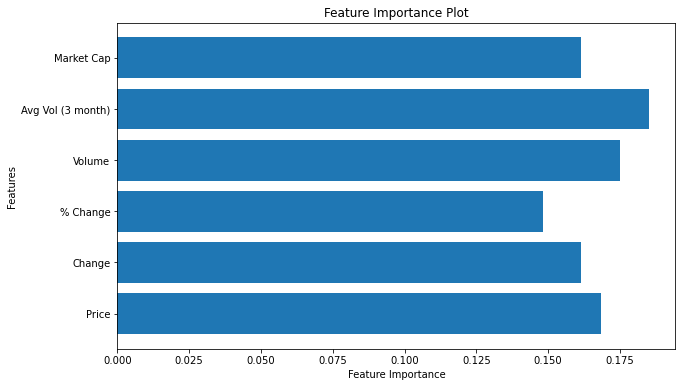

In [147]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# KNN 

In [148]:
knn = KNeighborsClassifier(n_neighbors=3)

In [149]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [150]:
y_pred = knn.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.7111111111111111

In [152]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

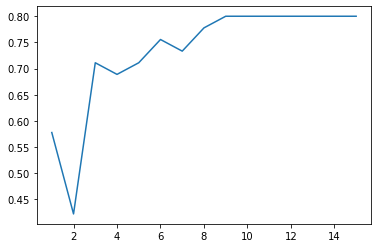

In [153]:
plt.plot(range(1,16),scores)

In [249]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [252]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [253]:
grid.best_score_

0.7823809523809524

In [254]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [257]:
knn = KNeighborsClassifier(n_neighbors=9, algorithm= 'auto', weights= 'uniform')

In [258]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [259]:
y_pred = knn.predict(X_test)

In [260]:
accuracy_score(y_test,y_pred)

0.8

# Logistic Regression

In [158]:
clf = LogisticRegression()

In [159]:
clf.fit(X_train,y_train)

LogisticRegression()

In [160]:
y_pred=clf.predict(X_test)

In [162]:
print(accuracy_score(y_test,y_pred))

0.8


In [164]:
param_grid = {
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

In [166]:
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [167]:
grid.best_score_

0.7879365079365079

In [168]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [170]:
clf = LogisticRegression(penalty='l2',C=.001)

In [171]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [172]:
y_pred=clf.predict(X_test)

In [173]:
print(accuracy_score(y_test,y_pred))

0.8


In [174]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7879365079365079

# Random Forest 

In [232]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

0.7653631284916201

In [233]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

In [234]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
criterion=["gini", "entropy", "log_loss"]

In [236]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'criterion':criterion
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'criterion': ['gini', 'entropy', 'log_loss']}


In [237]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [238]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\sanch\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sanch\anaconda3\lib\site-package

GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [239]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.2,
 'max_samples': 0.5,
 'n_estimators': 20}

In [242]:
rf = RandomForestClassifier(oob_score=True, criterion= 'entropy',max_depth= 8,max_features= 0.2,max_samples= 0.5,n_estimators= 20)
rf.fit(X_train,y_train)
rf.oob_score_

0.7597765363128491

In [243]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

# Naive Bayes 

In [212]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [213]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


# SVM 

In [214]:
# Create SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [215]:
# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [216]:
param_grid = {
    "kernel": ['rbf', 'sigmoid','poly'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}

In [217]:
grid = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [218]:
grid.best_score_

0.7879365079365079

In [219]:
grid.best_params_

{'C': 0.001, 'kernel': 'rbf'}

In [220]:
# Create SVM classifier
svm_classifier = SVC(kernel='rbf',C=0.001)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(C=0.001)

In [221]:
# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [224]:
cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7879365079365079

In [226]:
param_grid = {
    "kernel": ['rbf', 'sigmoid','poly'],
    "C": [0.001,0.003,0.005,0.007,0.009],
    'gamma':['Scale','auto']
}

In [227]:
grid = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanch\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Scale' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\sanch\anaconda3\lib\site-pac

GridSearchCV(cv=5, estimator=SVC(C=0.001),
             param_grid={'C': [0.001, 0.003, 0.005, 0.007, 0.009],
                         'gamma': ['Scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [228]:
grid.best_score_

0.7879365079365079

In [229]:
grid.best_params_

{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}

In [230]:
# Create SVM classifier
svm_classifier = SVC(kernel='rbf',C=0.001,gamma='auto')

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(C=0.001, gamma='auto')

In [231]:
# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [247]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
knn_scores = knn_model.predict_proba(X_test)[:,1]

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_scores = rf_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_scores = svm_model.predict_proba(X_test)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_scores)
rf_auc = roc_auc_score(y_test, rf_scores)


# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)


# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'RF (Area = {rf_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace2 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace3 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure

ValueError: multiclass format is not supported

In [248]:
#since the target variable has more than 2 classes roc curve is not supported 